In [7]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
df= pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X= df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [6]:
y= df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numerical_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 19) (200, 19) (800,) (200,)


In [12]:
# Create an evaluation function to give all metrics after model training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "KNeighbors Regression": KNeighborsRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    model_list.append(list(models.keys())[i])
    r2_list.append(test_r2)
    
    print(f"Model: {list(models.keys())[i]}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
    print("-" * 30)

Model: Linear Regression
Train MAE: 4.2667, Test MAE: 4.2148
Train MSE: 28.3349, Test MSE: 29.0952
Train RMSE: 5.3231, Test RMSE: 5.3940
Train R2: 0.8743, Test R2: 0.8804
------------------------------
Model: Ridge Regression
Train MAE: 4.2650, Test MAE: 4.2111
Train MSE: 28.3378, Test MSE: 29.0563
Train RMSE: 5.3233, Test RMSE: 5.3904
Train R2: 0.8743, Test R2: 0.8806
------------------------------
Model: Lasso Regression
Train MAE: 5.2063, Test MAE: 5.1579
Train MSE: 43.4784, Test MSE: 42.5064
Train RMSE: 6.5938, Test RMSE: 6.5197
Train R2: 0.8071, Test R2: 0.8253
------------------------------
Model: ElasticNet Regression
Train MAE: 6.1701, Test MAE: 6.3901
Train MSE: 60.0189, Test MSE: 63.3594
Train RMSE: 7.7472, Test RMSE: 7.9599
Train R2: 0.7338, Test R2: 0.7396
------------------------------
Model: KNeighbors Regression
Train MAE: 4.5168, Test MAE: 5.6210
Train MSE: 32.5799, Test MSE: 52.6066
Train RMSE: 5.7079, Test RMSE: 7.2530
Train R2: 0.8555, Test R2: 0.7838
---------------

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
6,Random Forest Regression,0.852730
10,CatBoost,0.851632
7,AdaBoost Regression,0.848151
9,XGBoost,0.827797
2,Lasso Regression,0.825320
4,KNeighbors Regression,0.783813
5,Decision Tree Regression,0.741060
3,ElasticNet Regression,0.739624


In [16]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is: {score:.2f}%")

Accuracy of the model is: 88.04%


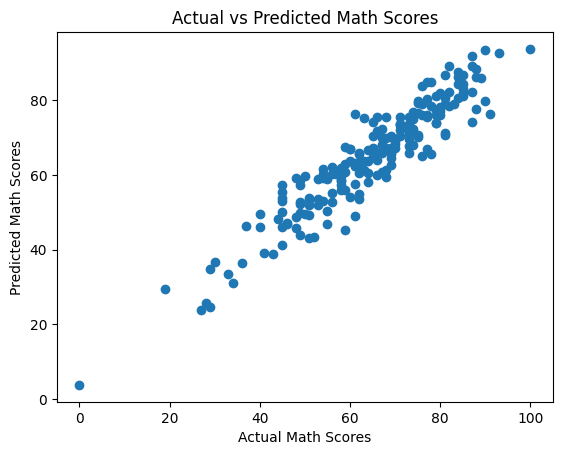

In [17]:
# plot y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

<Axes: xlabel='math_score'>

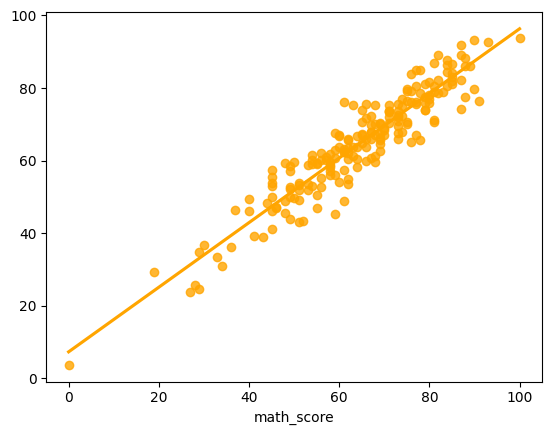

In [19]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='orange')

In [24]:
# difference between actual and predicted values
pred_diff=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
pred_diff.head()

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
